In [ ]:
!pip install pulp
!apt-get install -y -qq glpk-utils
!apt-get install coinor-cbc  # CoinOR

     |████████████████████████████████| 40.6MB 105kB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up li

In [ ]:
from pulp import *

In [7]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('/content/basededatostfmrestringido - Hoja 1.csv', header=0, nrows=9)

In [25]:
df

,País,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,ease_doing,restaurantes,preciominor,calidadvino
0,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.90
1,Francia,290855,9.5,28.6,536123,543,2.7,9,3212,0.16,32,188,10.3,88.40
2,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
3,Portugal,125514,4.1,75.7,257144,488,0.5,13,889,0.59,39,26,58.3,88.25
4,Bélgica,109994,3.6,10.3,49068,2242,3.1,4,1513,0.33,46,44,5.7,90.40
5,Suecia,72597,2.4,11.0,23871,3041,2.1,3,3358,0.16,10,26,9.6,83.00
6,Italia,65576,2.1,18.6,112596,582,1.0,3,1026,0.53,58,100,10.2,88.56
7,República Checa,15707,0.5,8.0,16986,925,0.7,9,1758,0.14,41,15,6.6,87.25
8,Austria,9219,0.3,6.0,2685,3434,0.7,6,1324,0.30,27,94,8.9,90.10


In [26]:
prob = LpProblem("TFM",LpMaximize)

In [14]:
countries = list(df['País'])

# Create a dictinary of costs 
costs = dict(zip(countries,df['preciominor']))

# Create a dictionary of calories for all food items
cultura = dict(zip(countries,df['restaurantes']))

# Create a dictionary of total fat for all food items
distancia = dict(zip(countries,df['Distancia']))

# Create a dictionary of carbohydrates for all food items
calidad = dict(zip(countries,df['calidadvino']))

In [16]:
country_vars = LpVariable.dicts("TFM",countries,lowBound=0,cat='Continuous')

In [18]:
prob += lpSum([costs[i]*country_vars[i] for i in countries])

In [20]:
prob += lpSum([distancia[f] * country_vars[f] for f in countries]) >= 1
prob += lpSum([distancia[f] * country_vars[f] for f in countries]) <= 130000.0

In [21]:
prob.solve()

1

In [22]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [23]:
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

TFM_Portugal = 146.23172


In [27]:
#reiniciar las variables para no escribir por encima
countries = list(df['País'])

# Create a dictinary of costs 
costs = dict(zip(countries,df['preciominor']))

# Create a dictinary of quantity
cantidad = dict(zip(countries,df['cantidad']))

# Create a dictinary of profits
ganancia = dict(zip(countries,df['valorexpo']))

# Create a dictionary of calories for all food items
cultura = dict(zip(countries,df['restaurantes']))

# Create a dictionary of total fat for all food items
distancia = dict(zip(countries,df['Distancia']))

# Create a dictionary of carbohydrates for all food items
calidad = dict(zip(countries,df['calidadvino']))

In [28]:
country_vars = LpVariable.dicts("TFM",countries,lowBound=0,cat='Continuous')

In [29]:
prob += lpSum([costs[i]*country_vars[i] for i in countries])

In [30]:
prob += lpSum([distancia[f] * country_vars[f] for f in countries]) >= 0
prob += lpSum([distancia[f] * country_vars[f] for f in countries]) <= 3358.0

In [31]:
# calidad
prob += lpSum([calidad[f] * country_vars[f] for f in countries]) >= 0, "CalidadMinimum"
prob += lpSum([calidad[f] * country_vars[f] for f in countries]) <= 100.0, "CalidadMaximum"

# preciominor
prob += lpSum([costs[f] * country_vars[f] for f in countries]) >= 3.0, "precioMinimum"
prob += lpSum([costs[f] * country_vars[f] for f in countries]) <= 200.0, "precioMaximum"

# restaurantes
prob += lpSum([cultura[f] * country_vars[f] for f in countries]) >= 1, "restMinimum"
prob += lpSum([cultura[f] * country_vars[f] for f in countries]) <= 300.0, "restMaximum"

# Protein
prob += lpSum([ganancia[f] * country_vars[f] for f in countries]) >= 0, "gananciaMinimum"
prob += lpSum([ganancia[f] * country_vars[f] for f in countries]) <= 4000000, "gananciaMaximum"

In [32]:
prob.solve()

1

In [33]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [34]:
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

TFM_Portugal = 1.1331445


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class Agent():
    def __init__(self):
        self.truth_mat = np.matrix(np.full((2048,2048),None))
        self.guess_mat = np.matrix(np.full((2048,2048),None))
        self.reward_mat = np.matrix(np.full((2048,2048),None)) 

        self.x = []
        self.y = []
        self.counter = 0

    def reset(self):
        '''
        reset the agent
        '''
        self.truth_mat = np.matrix(np.full((2048,2048),None))
        self.guess_mat = np.matrix(np.full((2048,2048),None))
        self.reward_mat = np.matrix(np.full((2048,2048),None))
        self.x = []
        self.y = []
        self.counter = 0

    @staticmethod
    def guess(a,b):
        '''
        returns random guess of the sum a + b
        '''
        return np.random.randint(0,11)
    
    def ask(self,a,b):
        '''
        ask the agent the sum of two numbers
        '''
        return self.guess_mat[a,b]

    def run_rnd(self,step=None,verbose=False):
        '''
        The agent learns how to sum two numbers included in [0,5]
        cycle over all elements of matrices, for each element randomly guess a
        sum, evaluate the true sum and calculate the difference (reward).
        All the informations are stored in agent's memory in the form of
        matrices.
        Params:
            step: (int) execute a given number of cycles. Learning can be
                  examined through *_mat variables and resumed later
            verbose: print the reward matrix each timestep
        Returns a plot of the average reward (y) over timesteps(x)
        '''
        if step:
            for _ in range(step):
                for i in range(2048):
                    for j in range(2048):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] != 0:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')   
        else:
            while np.all(self.reward_mat == 0) == False:
                for i in range(2048):
                    for j in range(2048):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] != 0:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')   
        fig, ax = plt.subplots()
        ax.plot(self.x,self.y)
        ax.set_title('Run Random')
        ax.set_xlabel('Cycles')
        ax.set_ylabel('Error')
        return plt.show()
        return plt.show()

    def run_smart(self,step=None,verbose=True):
        '''
        The agent learns how to sum two numbers included in [0,5],
        cycle over all elements of matrices.
        For each element: if the reward is not set take a guess,
        evaluate the true sum and calculate the reward),
        if the reward is negative increase the previous guess by 1,
        if the reward is positive decrease the
        previous guess by 1. All the informations are stored in agent's memory 
        in the form of matrices.
        Params:
            step: (int) execute a given number of cycles. Learning can be
                  examined through *_mat variables and resumed later
            verbose: print the reward matrix each timestep
        Returns a plot of the average reward (y) over timesteps(x)
        '''
        if step:
            for _ in range(step):
                for i in range(2048):
                    for j in range(2048):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] == None:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] > 0:
                            self.guess_mat[i,j] -= 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] < 0:
                            self.guess_mat[i,j] += 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')
        else:
            while np.all(self.reward_mat == 0) == False:
                for i in range(2048):
                    for j in range(2048):
                        self.truth_mat[i,j] = i + j
                        if self.reward_mat[i,j] == None:
                            self.guess_mat[i,j] = self.guess(i,j)
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] > 0:
                            self.guess_mat[i,j] -= 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                        elif self.reward_mat[i,j] < 0:
                            self.guess_mat[i,j] += 1
                            self.reward_mat[i,j] = self.guess_mat[i,j] - self.truth_mat[i,j]
                self.counter += 1
                self.x.append(self.counter)
                self.y.append(np.sum(np.abs(self.reward_mat)))                
                print('Cycle:{} Reward average:{:.3f} Error:{}'.format(self.counter,np.mean(self.reward_mat),np.sum(np.abs(self.reward_mat))))
                if verbose:
                    print('Reward matrix:\n',self.reward_mat,end='\n\n')
        fig, ax = plt.subplots()
        ax.plot(self.x,self.y)
        ax.set_title('Run Smart')
        ax.set_xlabel('Cycles')
        ax.set_ylabel('Error')
        return plt.show()

In [37]:
new = Agent()
new.run_rnd()

KeyboardInterrupt: ignored

In [ ]:
new.reset()
new.run_smart()

In [39]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from matplotlib import animation, rc

!pip install qbstyles
from qbstyles import mpl_style
mpl_style(dark=False)

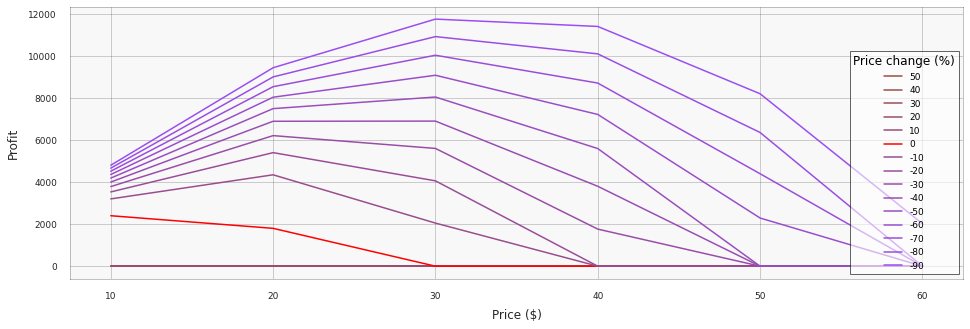

In [42]:

## Environment simulator
def plus(x):
  return 0 if x < 0 else x

def minus(x):
  return 0 if x > 0 else -x

def shock(x):
  return np.sqrt(x)

# Demand at time step t for current price p_t and previous price p_t_1
def q_t(p_t, p_t_1, q_0, k, a, b):
  return plus(q_0 - k*p_t - a*shock(plus(p_t - p_t_1)) + b*shock(minus(p_t - p_t_1)))

# Profit at time step t
def profit_t(p_t, p_t_1, q_0, k, a, b, unit_cost):
  return q_t(p_t, p_t_1, q_0, k, a, b)*(p_t - unit_cost) 

# Total profit for price vector p over len(p) time steps
def profit_total(p, unit_cost, q_0, k, a, b):
  return profit_t(p[0], p[0], q_0, k, 0, 0, unit_cost) + sum(map(lambda t: profit_t(p[t], p[t-1], q_0, k, a, b, unit_cost), range(len(p))))

## Environment parameters
T = 4
price_max = 70
price_step = 10
q_0 = 500
k = 20
unit_cost = 2
a_q = 300
b_q = 100

## Partial bindings for readability
def profit_t_response(p_t, p_t_1):
  return profit_t(p_t, p_t_1, q_0, k, a_q, b_q, unit_cost)

def profit_response(p):
  return profit_total(p, unit_cost, q_0, k, a_q, b_q)

## Visualize price-demand functions
price_grid = np.arange(price_step, price_max, price_step)
price_change_grid = np.arange(0.5, 2.0, 0.1)
profit_map = np.zeros( (len(price_grid), len(price_change_grid)) )
for i in range(len(price_grid)):
  for j in range(len(price_change_grid)):
    profit_map[i,j] = profit_t_response(price_grid[i], price_grid[i]*price_change_grid[j])

plt.figure(figsize=(16, 5))
for i in range(len(price_change_grid)):
  if math.isclose(price_change_grid[i], 1.0):
    color = 'red'
  else:
    color = (0.6, 0.3, price_change_grid[i]/2.0)
  plt.plot(price_grid, profit_map[:, i], c=color)
plt.xlabel("Price ($)")
plt.ylabel("Profit")
plt.legend(np.int_(np.round((1-price_change_grid)*100)), loc='lower right', title="Price change (%)", fancybox=False, framealpha=0.6)

In [43]:

# Find optimal constant price

profits = np.array([ profit_response(np.repeat(p, T)) for p in price_grid ])
p_idx = np.argmax(profits)
price_opt_const = price_grid[p_idx]

print(f'Optimal price is {price_opt_const}, achieved profit is {profits[p_idx]}')

Optimal price is 10, achieved profit is 12000.0


[60 30 20 10]
Achieved profit is 24958.15352658244


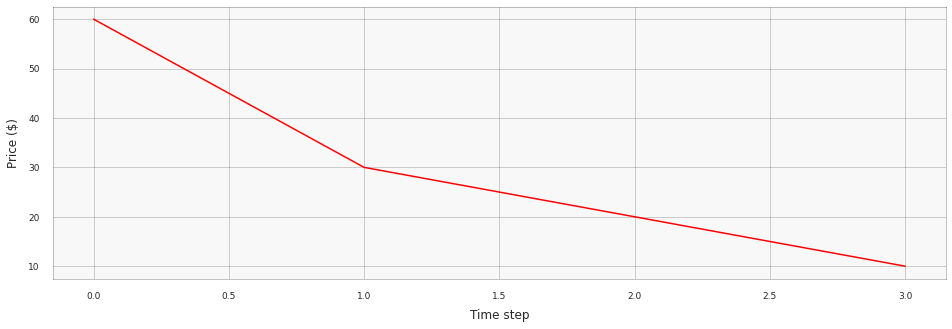

In [44]:
# Find optimal sequence of prices using greedy search

def find_optimal_price_t(p_baseline, price_grid, t):
  p_grid = np.tile(p_baseline, (len(price_grid), 1))
  p_grid[:, t] = price_grid
  profit_grid = np.array([ profit_response(p) for p in p_grid ])
  return price_grid[ np.argmax(profit_grid) ]

p_opt = np.repeat(price_opt_const, T)
for t in range(T):
  price_t = find_optimal_price_t(p_opt, price_grid, t)
  p_opt[t] = price_t

print(p_opt)
print(f'Achieved profit is {profit_response(p_opt)}')

plt.figure(figsize=(16, 5))
plt.xlabel("Time step")
plt.ylabel("Price ($)")
plt.plot(range(len(p_opt)), p_opt, c='red')

In [45]:
# Visualization functions

from bokeh.io import show, output_notebook
from bokeh.palettes import PuBu4
from bokeh.plotting import figure
from bokeh.models import Label

output_notebook()

def plot_return_trace(returns, smoothing_window=10, range_std=2):
  plt.figure(figsize=(16, 5))
  plt.xlabel("Episode")
  plt.ylabel("Return ($)")
  returns_df = pd.Series(returns)
  ma = returns_df.rolling(window=smoothing_window).mean()
  mstd = returns_df.rolling(window=smoothing_window).std()
  plt.plot(ma, c = 'blue', alpha = 1.00, linewidth = 1)
  plt.fill_between(mstd.index, ma-range_std*mstd, ma+range_std*mstd, color='blue', alpha=0.2)

def plot_price_schedules(p_trace, sampling_ratio, last_highlights, fig_number=None):
  plt.figure(fig_number);
  plt.xlabel("Time step");
  plt.ylabel("Price ($)");
  plt.plot(range(T), np.array(p_trace[0:-1:sampling_ratio]).T, c = 'k', alpha = 0.05)
  return plt.plot(range(T), np.array(p_trace[-(last_highlights+1):-1]).T, c = 'red', alpha = 0.5, linewidth=2)

def bullet_graph(data, labels=None, bar_label=None, axis_label=None,
                size=(5, 3), palette=None, bar_color="black", label_color="gray"):
    stack_data = np.stack(data[:,2])

    cum_stack_data = np.cumsum(stack_data, axis=1)
    h = np.max(cum_stack_data) / 20

    fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    for idx, item in enumerate(data):

        if len(data) > 1:
            ax = axarr[idx]

        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(cum_stack_data[idx]):
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h, color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
            
    if bar_label is not None:
        rect = rects[0]
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width(),
            -height * .1,
            bar_label,
            ha='center',
            va='bottom',
            color='white')
    if axis_label:
        ax.set_xlabel(axis_label)
    fig.subplots_adjust(hspace=0)

Episode 980 of 1000 (98.00%)
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333
Best profit results: 26368.399153212333


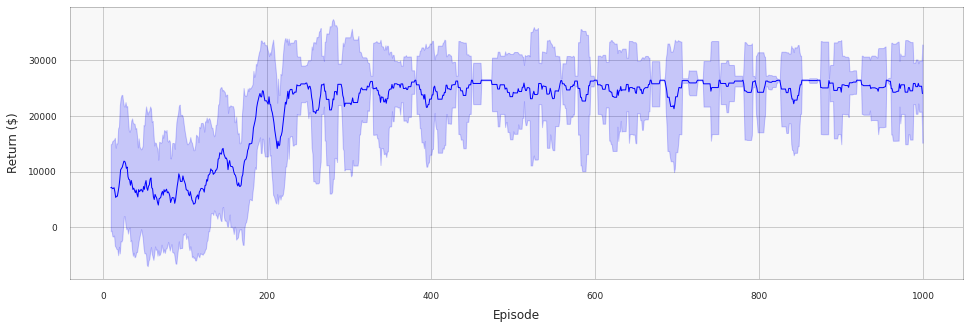

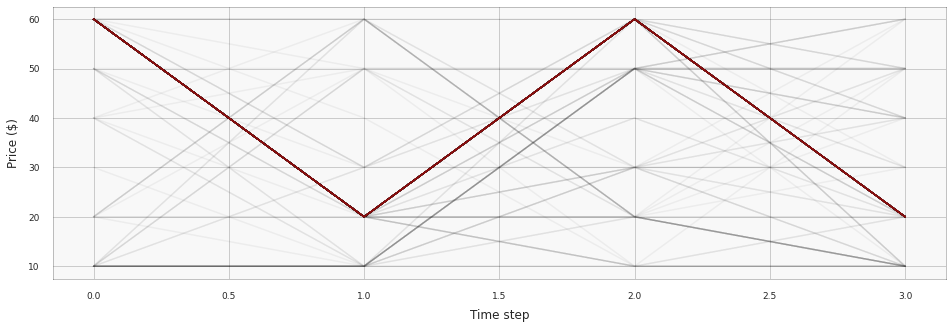

In [46]:
import math
import random
import numpy as np
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

# A cyclic buffer of bounded size that holds the transitions observed recently
class ReplayMemory(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

class PolicyNetworkDQN(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=128):
      super(PolicyNetworkDQN, self).__init__()
      layers = [
              nn.Linear(state_size, hidden_size),
              nn.ReLU(),
              nn.Linear(hidden_size, hidden_size),
              nn.ReLU(),
              nn.Linear(hidden_size, hidden_size),
              nn.ReLU(),
              nn.Linear(hidden_size, action_size)
      ]
      self.model = nn.Sequential(*layers)

    def forward(self, x):
      q_values = self.model(x)
      return q_values  

class AnnealedEpsGreedyPolicy(object):
  def __init__(self, eps_start = 0.9, eps_end = 0.05, eps_decay = 400):
    self.eps_start = eps_start
    self.eps_end = eps_end
    self.eps_decay = eps_decay
    self.steps_done = 0

  def select_action(self, q_values):
    sample = random.random()
    eps_threshold = self.eps_end + (self.eps_start - self.eps_end) * math.exp(-1. * self.steps_done / self.eps_decay)
    self.steps_done += 1
    if sample > eps_threshold:
        return np.argmax(q_values)
    else:
        return random.randrange(len(q_values))

GAMMA = 1.00
TARGET_UPDATE = 20
BATCH_SIZE = 512

def update_model(memory, policy_net, target_net):
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))

    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.stack([s for s in batch.next_state if s is not None])

    state_batch = torch.stack(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.stack(batch.reward)

    state_action_values = policy_net(state_batch).gather(1, action_batch)

    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()

    # Compute the expected Q values
    expected_state_action_values = reward_batch[:, 0] + (GAMMA * next_state_values)  

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))
    
    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

def env_intial_state():
  return np.repeat(0, 2*T)

def env_step(t, state, action):
  next_state = np.repeat(0, len(state))
  next_state[0] = price_grid[action]
  next_state[1:T] = state[0:T-1]
  next_state[T+t] = 1
  reward = profit_t_response(next_state[0], next_state[1])
  return next_state, reward

def to_tensor(x):
  return torch.from_numpy(np.array(x).astype(np.float32))

def to_tensor_long(x):
  return torch.tensor([[x]], device=device, dtype=torch.long)

policy_net = PolicyNetworkDQN(2*T, len(price_grid)).to(device)
target_net = PolicyNetworkDQN(2*T, len(price_grid)).to(device)
optimizer = optim.AdamW(policy_net.parameters(), lr = 0.005)
policy = AnnealedEpsGreedyPolicy()
memory = ReplayMemory(10000)

target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

num_episodes = 1000
return_trace = []
p_trace = [] # price schedules used in each episode
for i_episode in range(num_episodes):
    state = env_intial_state()
    reward_trace = []
    p = []
    for t in range(T):
        # Select and perform an action
        with torch.no_grad():
          q_values = policy_net(to_tensor(state))
        action = policy.select_action(q_values.detach().numpy())

        next_state, reward = env_step(t, state, action)

        # Store the transition in memory
        memory.push(to_tensor(state), 
                    to_tensor_long(action), 
                    to_tensor(next_state) if t != T - 1 else None, 
                    to_tensor([reward]))

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        update_model(memory, policy_net, target_net)

        reward_trace.append(reward)
        p.append(price_grid[action])

    return_trace.append(sum(reward_trace))
    p_trace.append(p)

    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

        clear_output(wait = True)
        print(f'Episode {i_episode} of {num_episodes} ({i_episode/num_episodes*100:.2f}%)')

plot_return_trace(return_trace)

fig = plt.figure(figsize=(16, 5))
plot_price_schedules(p_trace, 5, 1, fig.number)

for profit in sorted(profit_response(s) for s in p_trace)[-10:]:
  print(f'Best profit results: {profit}')

In [49]:
# Debugging Q-values computations

transitions = memory.sample(10)
batch = Transition(*zip(*transitions))

non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
non_final_next_states = torch.stack([s for s in batch.next_state if s is not None])

state_batch = torch.stack(batch.state)
action_batch = torch.cat(batch.action)
reward_batch = torch.stack(batch.reward)

state_action_values = policy_net(state_batch).gather(1, action_batch)

next_state_values = torch.zeros(len(transitions), device=device)
next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()

expected_state_action_values = (next_state_values * GAMMA) + reward_batch[:, 0]

q_trace = []
for t in range(len(transitions)):
  print(f"Q_(s,a)[ {expected_state_action_values[t]} ] = r [ {reward_batch[t].item()} ] + g*Q_(s+1)[ {next_state_values[t]} ]  <> Q_(s,a)[ {state_action_values[t].item()} ]")
  q_trace.append([f"Sample {t}", state_action_values[t].item(), [reward_batch[t].item(), next_state_values[t]]])

Q_(s,a)[ 13219.35546875 ] = r [ 0.0 ] + g*Q_(s+1)[ 13219.35546875 ]  <> Q_(s,a)[ 13717.455078125 ]
Q_(s,a)[ 26211.00390625 ] = r [ 0.0 ] + g*Q_(s+1)[ 26211.00390625 ]  <> Q_(s,a)[ 26135.044921875 ]
Q_(s,a)[ 13184.19921875 ] = r [ 13184.19921875 ] + g*Q_(s+1)[ 0.0 ]  <> Q_(s,a)[ 13666.515625 ]
Q_(s,a)[ 26211.00390625 ] = r [ 0.0 ] + g*Q_(s+1)[ 26211.00390625 ]  <> Q_(s,a)[ 26135.044921875 ]
Q_(s,a)[ 26211.00390625 ] = r [ 0.0 ] + g*Q_(s+1)[ 26211.00390625 ]  <> Q_(s,a)[ 26135.044921875 ]
Q_(s,a)[ 4289.70654296875 ] = r [ 2400.0 ] + g*Q_(s+1)[ 1889.7064208984375 ]  <> Q_(s,a)[ 9046.4541015625 ]
Q_(s,a)[ 19346.478515625 ] = r [ 0.0 ] + g*Q_(s+1)[ 19346.478515625 ]  <> Q_(s,a)[ 19403.98046875 ]
Q_(s,a)[ 13184.19921875 ] = r [ 13184.19921875 ] + g*Q_(s+1)[ 0.0 ]  <> Q_(s,a)[ 13666.515625 ]
Q_(s,a)[ 2400.0 ] = r [ 2400.0 ] + g*Q_(s+1)[ 0.0 ]  <> Q_(s,a)[ 3751.733154296875 ]
Q_(s,a)[ 2400.0 ] = r [ 2400.0 ] + g*Q_(s+1)[ 0.0 ]  <> Q_(s,a)[ 1778.9420166015625 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


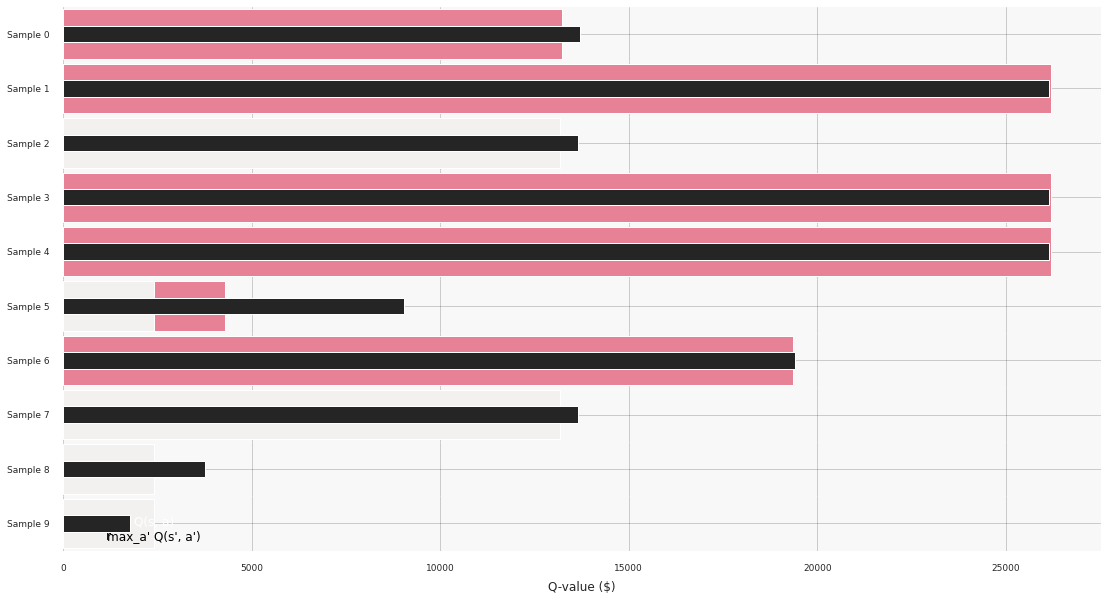

In [50]:
# Visualization of the debugging infomation for Q-values 

palette = sns.light_palette("crimson", 3, reverse=False)
bullet_graph(np.array(q_trace),
            labels=["r", "max_a' Q(s', a')"], bar_label="Q(s, a)", size=(20, 10),
            axis_label="Q-value ($)", label_color="black",
            bar_color="#252525", palette=palette)

In [51]:
num_episodes = 10
return_trace = []
q_values_rewards_trace = np.zeros((num_episodes, T, 2, ))
for i_episode in range(num_episodes):
    state = env_intial_state()
    for t in range(T):
        # Select and perform an action
        with torch.no_grad():
          q_values = policy_net(to_tensor(state)).detach().numpy()
        action = policy.select_action(q_values)

        next_state, reward = env_step(t, state, action)

        # Move to the next state
        state = next_state

        q_values_rewards_trace[i_episode][t][0] = q_values[action]
        for tau in range(t):
          q_values_rewards_trace[i_episode][tau][1] += reward * (GAMMA ** (t - tau))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


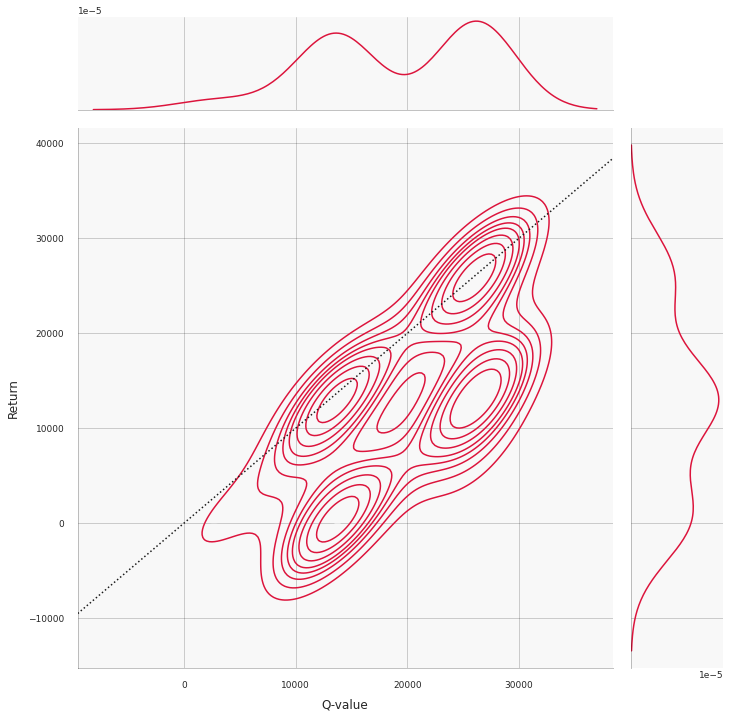

In [52]:
# Visualizing the distribution of Q-value vs actual returns 

values = np.reshape(q_values_rewards_trace, (num_episodes * T, 2, ))

df = pd.DataFrame(data=values, columns=['Q-value', 'Return'])
g = sns.jointplot(x="Q-value", y="Return", data=df, kind="kde", color="crimson", height=10, aspect=1.0)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+", alpha=0.1)
g.ax_joint.collections[0].set_alpha(0)

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')   

g.savefig("output.png")